In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [337]:
df = pd.read_excel(r"C:\Users\User\Downloads\Data_MidTerm_Project_Real_State_Regression(1).xls")
df

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520 2014-10-13         3       1.00         1180      5650   
1      6414100192 2014-12-09         3       2.25         2570      7242   
2      5631500400 2015-02-25         2       1.00          770     10000   
3      2487200875 2014-12-09         4       3.00         1960      5000   
4      1954400510 2015-02-18         3       2.00         1680      8080   
...           ...        ...       ...        ...          ...       ...   
21592   263000018 2014-05-21         3       2.50         1530      1131   
21593  6600060120 2015-02-23         4       2.50         2310      5813   
21594  1523300141 2014-06-23         2       0.75         1020      1350   
21595   291310100 2015-01-16         3       2.50         1600      2388   
21596  1523300157 2014-10-15         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0         1.0           0     0          3  ...        1180              0   
1         2.0           0     0          3  ...        2170            400   
2         1.0           0     0          3  ...         770              0   
3         1.0           0     0          5  ...        1050            910   
4         1.0           0     0          3  ...        1680              0   
...       ...         ...   ...        ...  ...         ...            ...   
21592     3.0           0     0          3  ...        1530              0   
21593     2.0           0     0          3  ...        2310              0   
21594     2.0           0     0          3  ...        1020              0   
21595     2.0           0     0          3  ...        1600              0   
21596     2.0           0     0          3  ...        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009             0    98103  47.6993 -122.346           1530   
21593      2014             0    98146  47.5107 -122.362           1830   
21594      2009             0    98144  47.5944 -122.299           1020   
21595      2004             0    98027  47.5345 -122.069           1410   
21596      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15   price  
0            5650  221900  
1            7639  538000  
2            8062  180000  
3            5000  604000  
4            7503  510000  
...           ...     ...  
21592        1509  360000  
21593        7200  400000  
21594        2007  402101  
21595        1287  400000  
21596        1357  325000  

[21597 rows x 21 columns]

In [338]:
df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

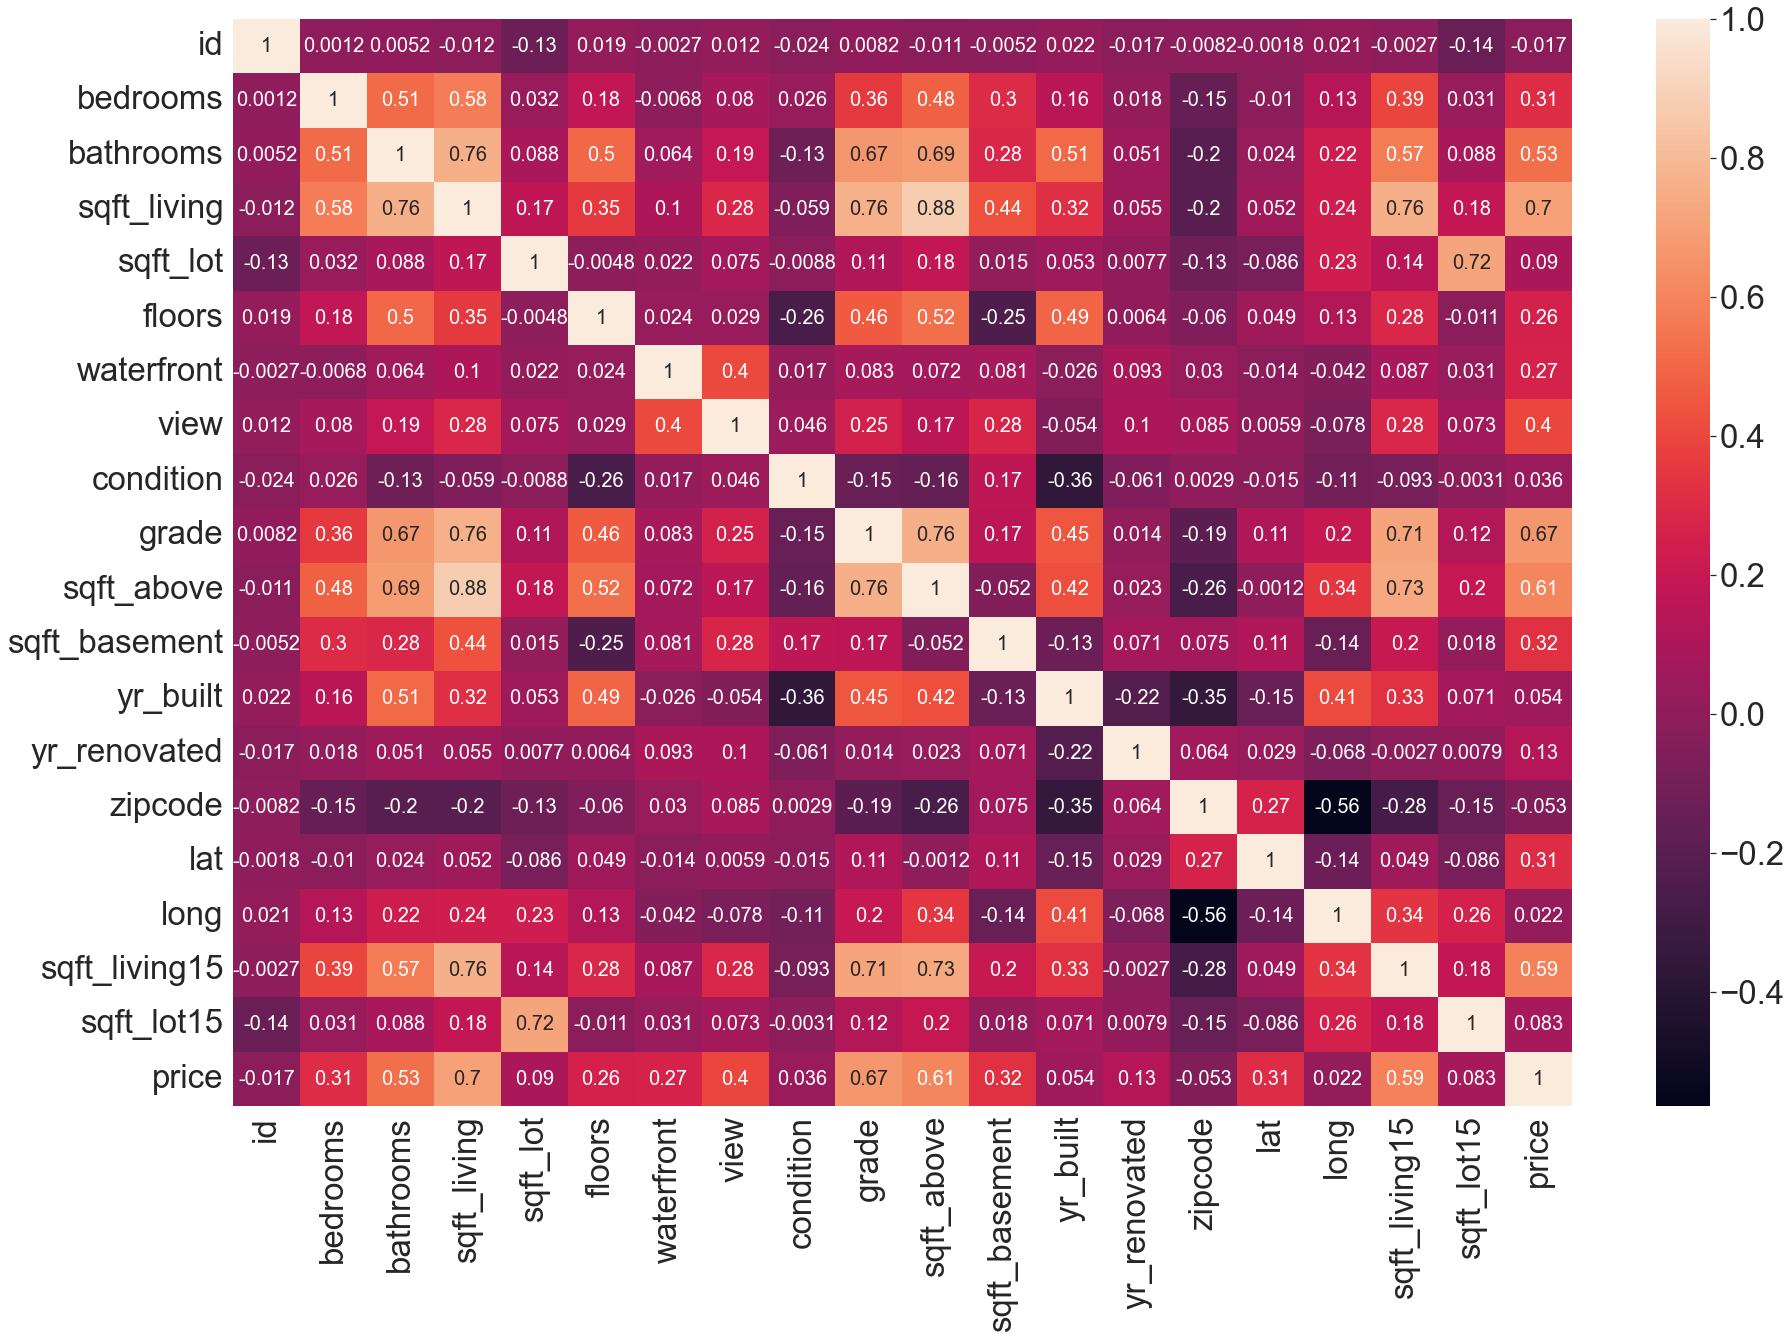

In [339]:
fig1=plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot_kws={"size":20},annot=True)
sns.set(font_scale=3)

In [340]:
df_int= df.select_dtypes(include=np.number)


In [341]:
df.describe()

id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   4.580474e+09      3.373200      2.115826   2080.321850  1.509941e+04   
std    2.876736e+09      0.926299      0.768984    918.106125  4.141264e+04   
min    1.000102e+06      1.000000      0.500000    370.000000  5.200000e+02   
25%    2.123049e+09      3.000000      1.750000   1430.000000  5.040000e+03   
50%    3.904930e+09      3.000000      2.250000   1910.000000  7.618000e+03   
75%    7.308900e+09      4.000000      2.500000   2550.000000  1.068500e+04   
max    9.900000e+09     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.007547      0.234292      3.409825      7.657915   
std        0.539683      0.086549      0.766390      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21597.000000   21597.000000  21597.000000  21597.000000  21597.000000   
mean    1788.596842     291.725008   1970.999676     84.464787  98077.951845   
std      827.759761     442.667800     29.375234    401.821438     53.513072   
min      370.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15         price  
count  21597.000000  21597.000000   21597.000000   21597.000000  2.159700e+04  
mean      47.560093   -122.213982    1986.620318   12758.283512  5.402966e+05  
std        0.138552      0.140724     685.230472   27274.441950  3.673681e+05  
min       47.155900   -122.519000     399.000000     651.000000  7.800000e+04  
25%       47.471100   -122.328000    1490.000000    5100.000000  3.220000e+05  
50%       47.571800   -122.231000    1840.000000    7620.000000  4.500000e+05  
75%       47.678000   -122.125000    2360.000000   10083.000000  6.450000e+05  
max       47.777600   -121.315000    6210.000000  871200.000000  7.700000e+06

In [342]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

Converting sqft to sq meter round up floors and bathrooms

In [343]:
df['bathrooms'] 

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21592    2.50
21593    2.50
21594    0.75
21595    2.50
21596    0.75
Name: bathrooms, Length: 21597, dtype: float64

In [344]:
df['bathrooms']=df['bathrooms'].round().astype(int)

In [345]:
df['floors']=np.ceil(df['floors']).astype(int)


In [346]:
# df['bathrooms']=df['bathrooms'].replace({1.5: 2,2.5:3,2.25:2,1.75:2,2.75:3,3.25:3,3.5:4,4.25:4,3.75:4,4.5:5,5.75:6})

In [347]:
df['bathrooms'].unique()

array([1, 2, 3, 4, 5, 6, 0, 7, 8])

In [348]:
#convert square feet to meter squared
def convert_sqft_m2(metersq):
    if isinstance(metersq, int):
        result = round(metersq / 10.764,-1)
    else: return metersq
    return result

In [349]:
df[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]=round(df[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']] / 10.764,0).astype(int)

In [350]:
df

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520 2014-10-13         3          1          110       525   
1      6414100192 2014-12-09         3          2          239       673   
2      5631500400 2015-02-25         2          1           72       929   
3      2487200875 2014-12-09         4          3          182       465   
4      1954400510 2015-02-18         3          2          156       751   
...           ...        ...       ...        ...          ...       ...   
21592   263000018 2014-05-21         3          2          142       105   
21593  6600060120 2015-02-23         4          2          215       540   
21594  1523300141 2014-06-23         2          1           95       125   
21595   291310100 2015-01-16         3          2          149       222   
21596  1523300157 2014-10-15         2          1           95       100   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0           1           0     0          3  ...         110              0   
1           2           0     0          3  ...         202             37   
2           1           0     0          3  ...          72              0   
3           1           0     0          5  ...          98             85   
4           1           0     0          3  ...         156              0   
...       ...         ...   ...        ...  ...         ...            ...   
21592       3           0     0          3  ...         142              0   
21593       2           0     0          3  ...         215              0   
21594       2           0     0          3  ...          95              0   
21595       2           0     0          3  ...         149              0   
21596       2           0     0          3  ...          95              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257            124   
1          1951          1991    98125  47.7210 -122.319            157   
2          1933             0    98028  47.7379 -122.233            253   
3          1965             0    98136  47.5208 -122.393            126   
4          1987             0    98074  47.6168 -122.045            167   
...         ...           ...      ...      ...      ...            ...   
21592      2009             0    98103  47.6993 -122.346            142   
21593      2014             0    98146  47.5107 -122.362            170   
21594      2009             0    98144  47.5944 -122.299             95   
21595      2004             0    98027  47.5345 -122.069            131   
21596      2008             0    98144  47.5941 -122.299             95   

       sqft_lot15   price  
0             525  221900  
1             710  538000  
2             749  180000  
3             465  604000  
4             697  510000  
...           ...     ...  
21592         140  360000  
21593         669  400000  
21594         186  402101  
21595         120  400000  
21596         126  325000  

[21597 rows x 21 columns]

In [351]:
df['year'] = pd.DatetimeIndex(df['date']).year
df

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520 2014-10-13         3          1          110       525   
1      6414100192 2014-12-09         3          2          239       673   
2      5631500400 2015-02-25         2          1           72       929   
3      2487200875 2014-12-09         4          3          182       465   
4      1954400510 2015-02-18         3          2          156       751   
...           ...        ...       ...        ...          ...       ...   
21592   263000018 2014-05-21         3          2          142       105   
21593  6600060120 2015-02-23         4          2          215       540   
21594  1523300141 2014-06-23         2          1           95       125   
21595   291310100 2015-01-16         3          2          149       222   
21596  1523300157 2014-10-15         2          1           95       100   

       floors  waterfront  view  condition  ...  sqft_basement  yr_built  \
0           1           0     0          3  ...              0      1955   
1           2           0     0          3  ...             37      1951   
2           1           0     0          3  ...              0      1933   
3           1           0     0          5  ...             85      1965   
4           1           0     0          3  ...              0      1987   
...       ...         ...   ...        ...  ...            ...       ...   
21592       3           0     0          3  ...              0      2009   
21593       2           0     0          3  ...              0      2014   
21594       2           0     0          3  ...              0      2009   
21595       2           0     0          3  ...              0      2004   
21596       2           0     0          3  ...              0      2008   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0                 0    98178  47.5112 -122.257            124         525   
1              1991    98125  47.7210 -122.319            157         710   
2                 0    98028  47.7379 -122.233            253         749   
3                 0    98136  47.5208 -122.393            126         465   
4                 0    98074  47.6168 -122.045            167         697   
...             ...      ...      ...      ...            ...         ...   
21592             0    98103  47.6993 -122.346            142         140   
21593             0    98146  47.5107 -122.362            170         669   
21594             0    98144  47.5944 -122.299             95         186   
21595             0    98027  47.5345 -122.069            131         120   
21596             0    98144  47.5941 -122.299             95         126   

        price  year  
0      221900  2014  
1      538000  2014  
2      180000  2015  
3      604000  2014  
4      510000  2015  
...       ...   ...  
21592  360000  2014  
21593  400000  2015  
21594  402101  2014  
21595  400000  2015  
21596  325000  2014  

[21597 rows x 22 columns]

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  int32         
 4   sqft_living    21597 non-null  int32         
 5   sqft_lot       21597 non-null  int32         
 6   floors         21597 non-null  int32         
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int32         
 12  sqft_basement  21597 non-null  int32         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [353]:
# df=df.drop('id','date','lat','long',axis=1)

In [360]:
for x in df['yr_renovated']:
    if x > 0:
        df['years_from_renovation']=df['year']-df['yr_renovated']
    else:
        x 
        
    
    
    
        


In [361]:

df        

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520 2014-10-13         3          1          110       525   
1      6414100192 2014-12-09         3          2          239       673   
2      5631500400 2015-02-25         2          1           72       929   
3      2487200875 2014-12-09         4          3          182       465   
4      1954400510 2015-02-18         3          2          156       751   
...           ...        ...       ...        ...          ...       ...   
21592   263000018 2014-05-21         3          2          142       105   
21593  6600060120 2015-02-23         4          2          215       540   
21594  1523300141 2014-06-23         2          1           95       125   
21595   291310100 2015-01-16         3          2          149       222   
21596  1523300157 2014-10-15         2          1           95       100   

       floors  waterfront  view  condition  ...  yr_built  yr_renovated  \
0           1           0     0          3  ...      1955             0   
1           2           0     0          3  ...      1951          1991   
2           1           0     0          3  ...      1933             0   
3           1           0     0          5  ...      1965             0   
4           1           0     0          3  ...      1987             0   
...       ...         ...   ...        ...  ...       ...           ...   
21592       3           0     0          3  ...      2009             0   
21593       2           0     0          3  ...      2014             0   
21594       2           0     0          3  ...      2009             0   
21595       2           0     0          3  ...      2004             0   
21596       2           0     0          3  ...      2008             0   

       zipcode      lat     long  sqft_living15  sqft_lot15   price  year  \
0        98178  47.5112 -122.257            124         525  221900  2014   
1        98125  47.7210 -122.319            157         710  538000  2014   
2        98028  47.7379 -122.233            253         749  180000  2015   
3        98136  47.5208 -122.393            126         465  604000  2014   
4        98074  47.6168 -122.045            167         697  510000  2015   
...        ...      ...      ...            ...         ...     ...   ...   
21592    98103  47.6993 -122.346            142         140  360000  2014   
21593    98146  47.5107 -122.362            170         669  400000  2015   
21594    98144  47.5944 -122.299             95         186  402101  2014   
21595    98027  47.5345 -122.069            131         120  400000  2015   
21596    98144  47.5941 -122.299             95         126  325000  2014   

       years_from_renovation  
0                       2014  
1                         23  
2                       2015  
3                       2014  
4                       2015  
...                      ...  
21592                   2014  
21593                   2015  
21594                   2014  
21595                   2015  
21596                   2014  

[21597 rows x 23 columns]

In [359]:
cor_matrix = df.corr().abs()
print(cor_matrix)

upper_triangle = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k = 1).astype(np.bool))
print(upper_triangle)
drop_cor = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print(); print(drop_cor)

                             id  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                     1.000000  0.001150   0.005859     0.012243  0.131911   
bedrooms               0.001150  1.000000   0.487955     0.578228  0.032472   
bathrooms              0.005859  0.487955   1.000000     0.702726  0.090532   
sqft_living            0.012243  0.578228   0.702726     1.000000  0.173439   
sqft_lot               0.131911  0.032472   0.090532     0.173439  1.000000   
floors                 0.016709  0.184901   0.332556     0.329883  0.000794   
waterfront             0.002727  0.006834   0.065424     0.103855  0.021631   
view                   0.011536  0.080008   0.203300     0.284721  0.074900   
condition              0.023803  0.026496   0.068032     0.059441  0.008829   
grade                  0.008188  0.356563   0.591830     0.762758  0.114731   
sqft_above             0.010791  0.479408   0.600454     0.876440  0.184149   
sqft_basement          0.005196  0.302800   0.334658

C:\Users\User\AppData\Local\Temp\ipykernel_22028\4044466504.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k = 1).astype(np.bool))


In [326]:
df_1=pd.get_dummies(df['zipcode'])
df_1=pd.concat([df,df_1],axis=1) 


In [327]:
df_cleaned=df_1.drop(['id','date','lat','long','grade', 'sqft_above', 'sqft_living15', 'years_from_renovation'],axis=1)
df_cleaned

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3          1          110       525       1           0     0   
1             3          2          239       673       2           0     0   
2             2          1           72       929       1           0     0   
3             4          3          182       465       1           0     0   
4             3          2          156       751       1           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21592         3          2          142       105       3           0     0   
21593         4          2          215       540       2           0     0   
21594         2          1           95       125       2           0     0   
21595         3          2          149       222       2           0     0   
21596         2          1           95       100       2           0     0   

       condition  sqft_basement  yr_built  ...  98146  98148  98155  98166  \
0              3              0      1955  ...      0      0      0      0   
1              3             37      1951  ...      0      0      0      0   
2              3              0      1933  ...      0      0      0      0   
3              5             85      1965  ...      0      0      0      0   
4              3              0      1987  ...      0      0      0      0   
...          ...            ...       ...  ...    ...    ...    ...    ...   
21592          3              0      2009  ...      0      0      0      0   
21593          3              0      2014  ...      1      0      0      0   
21594          3              0      2009  ...      0      0      0      0   
21595          3              0      2004  ...      0      0      0      0   
21596          3              0      2008  ...      0      0      0      0   

       98168  98177  98178  98188  98198  98199  
0          0      0      1      0      0      0  
1          0      0      0      0      0      0  
2          0      0      0      0      0      0  
3          0      0      0      0      0      0  
4          0      0      0      0      0      0  
...      ...    ...    ...    ...    ...    ...  
21592      0      0      0      0      0      0  
21593      0      0      0      0      0      0  
21594      0      0      0      0      0      0  
21595      0      0      0      0      0      0  
21596      0      0      0      0      0      0  

[21597 rows x 85 columns]

In [328]:
x=df_cleaned.drop('price', axis=1)
y=df_cleaned.price

In [329]:
x=x._get_numeric_data()
x

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3          1          110       525       1           0     0   
1             3          2          239       673       2           0     0   
2             2          1           72       929       1           0     0   
3             4          3          182       465       1           0     0   
4             3          2          156       751       1           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21592         3          2          142       105       3           0     0   
21593         4          2          215       540       2           0     0   
21594         2          1           95       125       2           0     0   
21595         3          2          149       222       2           0     0   
21596         2          1           95       100       2           0     0   

       condition  sqft_basement  yr_built  ...  98146  98148  98155  98166  \
0              3              0      1955  ...      0      0      0      0   
1              3             37      1951  ...      0      0      0      0   
2              3              0      1933  ...      0      0      0      0   
3              5             85      1965  ...      0      0      0      0   
4              3              0      1987  ...      0      0      0      0   
...          ...            ...       ...  ...    ...    ...    ...    ...   
21592          3              0      2009  ...      0      0      0      0   
21593          3              0      2014  ...      1      0      0      0   
21594          3              0      2009  ...      0      0      0      0   
21595          3              0      2004  ...      0      0      0      0   
21596          3              0      2008  ...      0      0      0      0   

       98168  98177  98178  98188  98198  98199  
0          0      0      1      0      0      0  
1          0      0      0      0      0      0  
2          0      0      0      0      0      0  
3          0      0      0      0      0      0  
4          0      0      0      0      0      0  
...      ...    ...    ...    ...    ...    ...  
21592      0      0      0      0      0      0  
21593      0      0      0      0      0      0  
21594      0      0      0      0      0      0  
21595      0      0      0      0      0      0  
21596      0      0      0      0      0      0  

[21597 rows x 84 columns]

In [330]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.30,random_state=123)

In [331]:
std_scaler=StandardScaler().fit(x_train)   ##. finding the parameters ( mean, variance from the training set )

x_train_scaled=std_scaler.transform(x_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [332]:
x_train.shape

(15117, 84)

In [333]:
x_test_scaled=std_scaler.transform(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [334]:
print(x_train_scaled)
print("--------")
print(x_test_scaled)

[[ 0.66673784 -0.08343427  0.0672157  ... -0.08119168 -0.11401784
  -0.12347117]
 [ 0.66673784  1.23727341  1.49373082 ... -0.08119168 -0.11401784
  -0.12347117]
 [-0.39859098 -0.08343427 -1.17221547 ... -0.08119168 -0.11401784
  -0.12347117]
 ...
 [ 1.73206666  2.55798109  2.25375936 ... -0.08119168 -0.11401784
  -0.12347117]
 [-0.39859098 -0.08343427 -0.17833199 ... -0.08119168 -0.11401784
  -0.12347117]
 [-1.46391979 -0.08343427 -0.99682427 ... -0.08119168 -0.11401784
  -0.12347117]]
--------
[[-0.39859098 -0.08343427 -0.22510297 ... -0.08119168 -0.11401784
  -0.12347117]
 [ 2.79739548  1.23727341  1.80943498 ... -0.08119168 -0.11401784
  -0.12347117]
 [-0.39859098 -1.40414195 -1.17221547 ... -0.08119168 -0.11401784
  -0.12347117]
 ...
 [ 0.66673784 -0.08343427  1.98482619 ... -0.08119168 -0.11401784
  -0.12347117]
 [-0.39859098 -0.08343427 -0.75127658 ... -0.08119168 -0.11401784
  -0.12347117]
 [-0.39859098 -0.08343427  2.05498267 ... -0.08119168 -0.11401784
  -0.12347117]]


In [335]:
x_train_const_scaled = sm.add_constant(x_train_scaled) # adding a constant

model = sm.OLS(y_train, x_train_const_scaled).fit()
predictions_train = model.predict(x_train_const_scaled) 

x_test_const_scaled = sm.add_constant(x_test_scaled) # adding a constant
predictions_test = model.predict(x_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     754.8
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:58:29   Log-Likelihood:            -2.0270e+05
No. Observations:               15117   AIC:                         4.056e+05
Df Residuals:                   15034   BIC:                         4.062e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.402e+05   1314.005    411.108      0.0